### Notebook to plot st-1photon behaviour with controls and non-st 1-photon behaviour

#### Currently in a hacky state, all txt files are read each time a plot is made and functioanlity is repeated

##### Definitely only read txt file once at start in future

In [1]:
#ipython magic
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
#general imports
import sys
sys.path.append('..')
sys.path.append('/home/jamesrowland/Documents/Code/Vape/utils')
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#notebook specific imports
import pickle
from opto_stim_import2 import BlimpImport

In [4]:
#global plotting params
sns.set()
sns.set_style('white')
sns.set_palette('muted')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [5]:
figure_path = '/home/jamesrowland/Documents/Code/Vape/figures'

In [6]:
## see the end of non-st 1-photon analysis for information about this dictionary 
with open('/home/jamesrowland/Documents/Code/Vape/run_pkls/non-st-1p-dict.pkl', 'rb') as f:
    nonst_dict = pickle.load(f)

In [7]:
c_autoswitch = nonst_dict['c_autoswitch']
s_autoswitch = nonst_dict['s_autoswitch']

In [8]:
def get_autoswitch(mouse_list):
       
    autoswitches = []
      
    for mouse_name in mouse_list: 
        autoswitch = 0
        mouse = BlimpImport(mouse_name)
        runs_1p = mouse.import_1p()
        for run in runs_1p:
            if not run.trial_autoswitch:
                autoswitch += run.n_trials_complete
            else:
                autoswitch += run.trial_autoswitch
                break
        autoswitches.append(autoswitch)
                
    return autoswitches

In [9]:
# list of c1v1-kv2.1 mice
kv21_names = ['RL047', 'RL048', 'J048', 'J047']
control_names = ['J045', 'J046', 'RL037', 'RL038']
### should use list of objects rather than name lists for rest of notebook (haven't implemented this yet### 

In [10]:
%%capture
kv21_autoswitch = get_autoswitch(kv21_names)
control_autoswitch = get_autoswitch(control_names)

In [11]:
x_opsin = [0] * len(c_autoswitch)
y_opsin = kv21_autoswitch
x_controls = [1] * len(s_autoswitch)
y_controls = control_autoswitch

In [144]:
def bar_plotter(data, labels, save_name, ypos, ylab = 'Trials to Criterion'):
    
    fig = plt.figure()

    mean_data = [np.nanmean(d) for d in data]
    bar_width = 0.9
    for i,d in enumerate(data):
        plt.plot([ypos[i]]*len(d), d, '.', color=sns.color_palette()[6], markersize=15)
    plt.bar(ypos, mean_data, bar_width)
    plt.xticks(ypos, labels)
    plt.ylabel(ylab)
    fig.autofmt_xdate()
    sns.despine()
    plt.savefig(os.path.join(figure_path, save_name + '.pdf'), )
    plt.savefig(os.path.join(figure_path, save_name + '.png'), bbox_inches="tight")

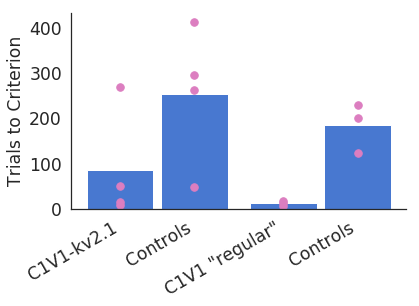

In [13]:
data = [kv21_autoswitch, control_autoswitch, c_autoswitch, s_autoswitch]
labels = ('C1V1-kv2.1', 'Controls', 'C1V1 "regular"', 'Controls')
save_name = 'Trial_autoswitch'
ypos = [0,1,2.2,3.2]

bar_plotter(data, labels, save_name, ypos)

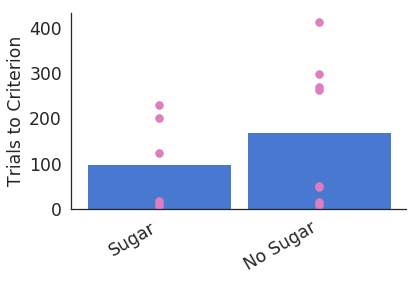

In [14]:
data = [np.concatenate((c_autoswitch,s_autoswitch)), np.concatenate((kv21_autoswitch,control_autoswitch))]
labels = ['Sugar','No Sugar']
save_name = 'Sugar_autoswitch'
ypos = [1,2]

bar_plotter(data, labels, save_name, ypos)

In [15]:
def get_power_arr(mouse_name):
    
    mouse = BlimpImport(mouse_name)
    runs_1p = mouse.import_1p()

    powers_on_sample = [10,5,2,1,0.5,0.2,0.1]
    
    LED_currents = []
    for run in runs_1p:
        [LED_currents.append(l) for l in run.LED_current]

    switch_trials = [i for i,d in enumerate(np.diff(LED_currents)) if d != 0] 
    
    power_arr = np.zeros(len(LED_currents)) - 100
    
    for i in range(len(switch_trials)):

        if i == 0: 
            power_arr[0:switch_trials[0]] = powers_on_sample[0]
        elif i == len(switch_trials)-1:
            power_arr[switch_trials[i]:] = powers_on_sample[-1]
        
        power_arr[switch_trials[i-1]:switch_trials[i]] = powers_on_sample[i-1]
            
    return power_arr
            
            
            

In [16]:
%%capture

def ladder_plot(mouse_list=None, processed_data=None, color=0, label=None):
    
    if mouse_list:
    
        power_arrs = []

        for mouse_name in mouse_list:
            power_arrs.append(get_power_arr(mouse_name))
    
    elif processed_data:
        power_arrs = processed_data

    maxlen =  max([len(a) for a in power_arrs]) 
    tomean = np.zeros((maxlen, len(power_arrs)))

    for i, arr in enumerate(power_arrs):
        arr = np.append(arr,[np.nan]*(maxlen - len(arr)))
        tomean[:,i] = arr

    meaned = np.nanmean(tomean,1)
    
    
    plt.plot(meaned, color=sns.color_palette()[color], label=label)
    
    for arr in power_arrs:
        plt.plot(arr, color=sns.color_palette()[color], alpha=0.2)
        
    return power_arrs
        
    
        

Importing data file: RL047-2019-06-12-181929.txt
Importing data file: RL047-2019-06-13-172939.txt
Importing data file: RL047-2019-06-14-175540.txt
Importing data file: RL047-2019-06-16-221750.txt
Importing data file: RL047-2019-06-18-203211.txt
Importing data file: RL047-2019-06-29-113001.txt
Importing data file: RL048-2019-06-12-181929.txt
Importing data file: RL048-2019-06-13-172939.txt
Importing data file: RL048-2019-06-14-175540.txt
Importing data file: RL048-2019-06-16-221750.txt
Importing data file: RL048-2019-06-18-203211.txt
Importing data file: J048-2019-06-12-164549.txt
Importing data file: J048-2019-06-13-160645.txt
Importing data file: J048-2019-06-14-163539.txt
Importing data file: J047-2019-06-12-164549.txt
Importing data file: J047-2019-06-13-160645.txt
Importing data file: J047-2019-06-14-163539.txt
Importing data file: J045-2019-06-01-131933.txt
Importing data file: J045-2019-06-02-162923.txt
Importing data file: J045-2019-06-03-210644.txt
Importing data file: J045-201

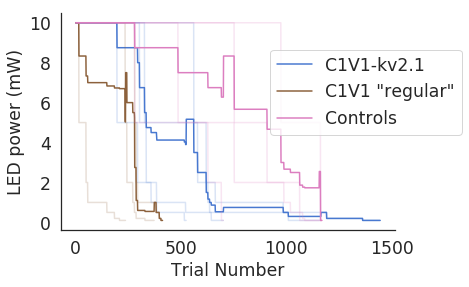

In [17]:
plt.figure()

ladder_plot(mouse_list = kv21_names, label='C1V1-kv2.1', color=0)
ladder_plot(processed_data = nonst_dict['c_steps'], label='C1V1 "regular"', color=5)
ladder_plot(mouse_list = control_names, label='Controls', color=6)



plt.xlabel('Trial Number')
plt.ylabel('LED power (mW)')
plt.legend(bbox_to_anchor=(0.6, 0.4))
sns.despine()
plt.savefig(os.path.join(figure_path, 'kv21_ladder.pdf'),bbox_inches="tight")
plt.savefig(os.path.join(figure_path, 'kv21_ladder.png'),bbox_inches="tight")

In [23]:
# l = ladder_plot2(mouse_list = kv21_names)

# plt.plot(l)

In [99]:
def ntrials_complete_ladder(mouse_list=None, processed_data=None, color=0, label=None):

    
    if mouse_list:
        
        ntrials_list = []
    
        max_trials = 0
        
        for mouse_name in mouse_list:
            
            mouse = BlimpImport(mouse_name)
            runs_1p = mouse.import_1p()

            did_complete = False
            n_trials = 0
      
            for run in runs_1p:
    
                complete = run.trial_complete

                if complete:
                    n_trials += complete
                    did_complete = True
                    break
                else:
                    n_trials += run.n_trials_complete
                    
            tot_trials = sum([run.n_trials_complete for run in runs_1p])
            print(tot_trials)
            
            if n_trials > max_trials:
                max_trials = n_trials

            # need to manual correct as failed to record complete session
            if mouse_name == 'J047':
                n_trials+=100
                did_complete=True

            if did_complete:
                ntrials_list.append(n_trials)
                
    elif processed_data:
        ntrials_list = processed_data
        max_trials = max(ntrials_list)


    ntrials_list.sort()
        
    ladder = np.zeros(max_trials+1)

    for l in ntrials_list:
        ladder[l:] += 1
        
    plt.plot(ladder, color=sns.color_palette()[color], label=label)



Importing data file: RL047-2019-06-12-181929.txt
/home/jamesrowland/Documents/packerstation/jrowland/Data/2019-06-12/Behaviour1/RL047-2019-06-12-181929.txt
Importing data file: RL047-2019-06-13-172939.txt
/home/jamesrowland/Documents/packerstation/jrowland/Data/2019-06-13/Behaviour1/RL047-2019-06-13-172939.txt
Importing data file: RL047-2019-06-14-175540.txt
/home/jamesrowland/Documents/packerstation/jrowland/Data/2019-06-14/Behaviour1/RL047-2019-06-14-175540.txt
Importing data file: RL047-2019-06-16-221750.txt
/home/jamesrowland/Documents/packerstation/jrowland/Data/2019-06-16/Behaviour1/RL047-2019-06-16-221750.txt
Importing data file: RL047-2019-06-18-203211.txt
/home/jamesrowland/Documents/packerstation/jrowland/Data/2019-06-18/Behaviour1/RL047-2019-06-18-203211.txt
Importing data file: RL047-2019-06-29-113001.txt
/home/jamesrowland/Documents/packerstation/jrowland/Data/2019-06-29/Behaviour1/RL047-2019-06-29-113001.txt
1447
Importing data file: RL048-2019-06-12-181929.txt
/home/jame

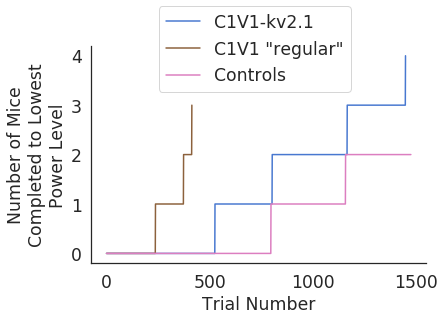

In [113]:
c_steps = nonst_dict['c_steps']
s_steps = nonst_dict['s_steps']

plt.figure()
ntrials_complete_ladder(mouse_list = kv21_names, label='C1V1-kv2.1', color=0)
ntrials_complete_ladder(processed_data = [len(c) for c in c_steps], label='C1V1 "regular"', color=5)
ntrials_complete_ladder(mouse_list = control_names, label='Controls', color=6)


plt.xlabel('Trial Number')
plt.ylabel('Number of Mice\nCompleted to Lowest\nPower Level')
plt.legend(loc='centre', bbox_to_anchor=(0.8, 0.75))
sns.despine()
plt.savefig(os.path.join(figure_path, 'ntrials_ladder.pdf'),bbox_inches="tight")
plt.savefig(os.path.join(figure_path, 'ntrials_ladder.png'),bbox_inches="tight")

In [ ]:
def get_dprime(mouse_list):
       
    autoswitches = []
    dprimes = []
    
    for mouse_name in mouse_list:
        
        mouse = BlimpImport(mouse_name)
        runs_1p = mouse.import_1p()
        for run in runs_1p:
            dprimes.append(run.dprime)
                
    return dprimes

In [129]:
def get_flat_dprime(mouse_list):
    

    dprimes = []
    for mouse_name in mouse_list:   

        mouse = BlimpImport(mouse_name)
        runs_1p = mouse.import_1p()

        for run in runs_1p:
            dprimes.append(run.dprime)
    
  
    return dprimes


In [141]:
%%capture
data = [get_flat_dprime(kv21_names), get_flat_dprime(control_names), nonst_dict['c_dprimes'], nonst_dict['s_dprimes']]

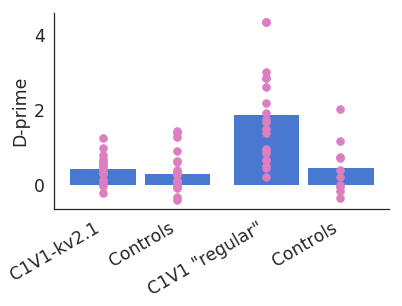

In [145]:
labels = ('C1V1-kv2.1', 'Controls', 'C1V1 "regular"', 'Controls')
save_name = 'flat_dprimes'
ypos = [0,1,2.2,3.2]


bar_plotter(data, labels, save_name, ypos, ylab='D-prime')

In [143]:
nonst_dict['s_dprimes']

array([-0.05309289,  2.03435811,  0.71818083,         nan,         nan,
               nan,         nan, -0.17262458,         nan,         nan,
               nan,         nan,         nan,         nan, -0.00697653,
        0.39674889,  1.16613013,  0.74232686,  0.2041169 , -0.37184677,
               nan])